Name:  

    Build_surface_albedo

Purpose:  

    Python script that builds surface albedo from SSFR measurements
    saves in a format that is useful for libradtran inputs

Calling Sequence:

    python Build_surface_albedo.py
  
Input:

    none at command line
  
Output:

    figures and text files
  
Keywords:

    none
  
Dependencies:

    - matplotlib
    - mpltools
    - numpy
    - scipy : for saving and reading
    - os
    - pdb : for debugging
    - datetime
    - mpl_toolkits
    - plotting_utils (user defined plotting routines)
  
Needed Files:

  - SSFR calibspcs .out file

In [2]:
%config InlineBackend.rc = {}
import matplotlib 
#matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpltools import color

In [3]:
%matplotlib notebook
import numpy as np, h5py
import scipy.io as sio
import scipy
import math, os, IPython
import Sp_parameters as Sp
IPython.InteractiveShell.cache_size = 0

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
import load_utils as lu
import h5py
from path_utils import getpath

In [5]:
# set the basic directory path
#fp='C:/Users/sleblan2/Research/ARISE/'
fp = getpath('ARISE')

Return path named:  ARISE /mnt/c/Users/sleblanc/Research/ARISE/


# Load SSFR file

In [6]:
daystr = '20140919'

## Load the idl out 

In [3]:
ssfr = sio.idl.readsav(fp+'c130/'+daystr+'_ARISE_Flight_13/'+daystr+'_calibspcs_attcorr.out')

C:\Python27_64\WinPython-64bit-2.7.6.4\python-2.7.6.amd64\lib\site-packages\scipy\io\idl.py:180: UserWarning: warning: empty strings are now set to '' instead of None
  warnings.warn("warning: empty strings are now set to '' instead of None")


## Plot out some data

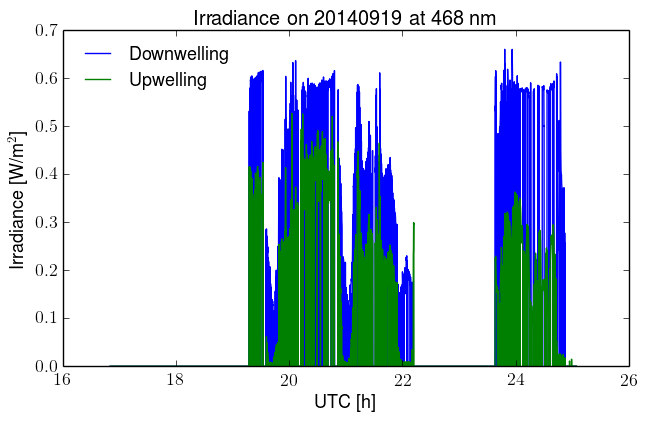

In [4]:
plt.plot(ssfr.tmhrs,ssfr.zspectra[:,50],label='Downwelling')
plt.plot(ssfr.tmhrs,ssfr.nspectra[:,50],label='Upwelling')
plt.ylabel('Irradiance [W/m$^{2}$]')
plt.xlabel('UTC [h]')
plt.title('Irradiance on '+daystr+' at %4i nm' % ssfr.zenlambda[50])
plt.legend(frameon=False,loc=2)

Loop and interpolate nadir spectra to zenith wavelengths

In [5]:
from scipy.interpolate import interp1d
fn = interp1d(ssfr.nadlambda,ssfr.nspectra,axis=1,bounds_error=False)
ssfr.nnspectra = fn(ssfr.zenlambda)

In [6]:
wvl = np.arange(350,1701)

In [7]:
ssfr.nspectra1 = fn(wvl)

In [8]:
fz = interp1d(ssfr.zenlambda,ssfr.zspectra,axis=1,bounds_error=False)
ssfr.zspectra1 = fz(wvl)

## Load the hdf5 file out

In [10]:
sh = h5py.File(fp+'c130/ARISE-SSFR_C130_20140919_R1.h5','r')


In [12]:
for key in sh.keys():
    print(key)

_000_readme
nadlambda
nbb
nspectra
utc
zbb
zenlambda
zspectra


In [13]:
ssfr = {}
for key in sh.keys():
    print(key)
    ssfr[key] = sh[key][:]

_000_readme
nadlambda
nbb
nspectra
utc
zbb
zenlambda
zspectra


In [14]:
sh.close()

In [15]:
ssfr['_000_readme']

array(['                                                                                                                                                                                                               ',
       'PI: Dr. K. Sebastian Schmidt',
       'Organization: University of Colorado Boulder',
       'Instrument Name: SSFR', 'Mission Name: ARISE 2014',
       'Flight Date: 2014,09,19, Archive Date: 2015,05,16',
       'NADLAMBDA, nm, wavelength array of the nadir SSFR system; ',
       'NSPECTRA, W m^-2 nm^-1, upward spectral shortwave irradiance measured by the nadir SSFR system; ',
       'NBB, W m^-2 nm^-1, upward broadband irradiance (350-2150 nm); ',
       'ZENLAMBDA, nm, wavelength array of the zenith SSFR system; ',
       'ZSPECTRA, W m^-2 nm^-1, downward spectral shortwave irradiance measured by the zenith SSFR system; ',
       'ZBB, W m^-2 nm^-1, downward broadband irradiance (350-2150 nm); ',
       'UTC, s, indicates the start time of the sampling interva

In [16]:
ssfr['nbb']

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

## Plot out the hdf5 data

<IPython.core.display.Javascript object>


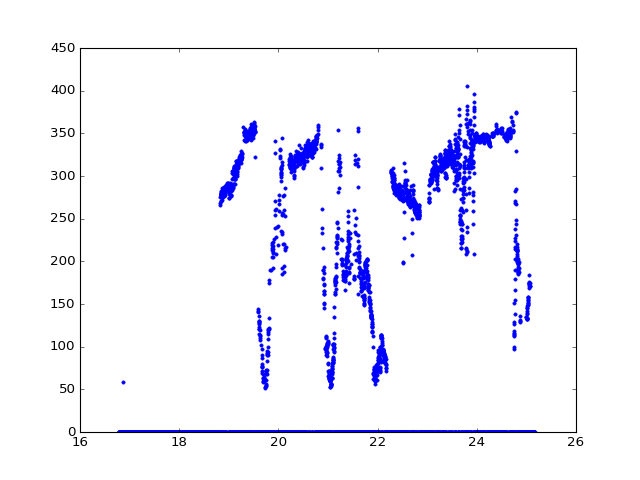

In [17]:
plt.figure()
plt.plot(ssfr['utc'],ssfr['zbb'],'.')

<IPython.core.display.Javascript object>


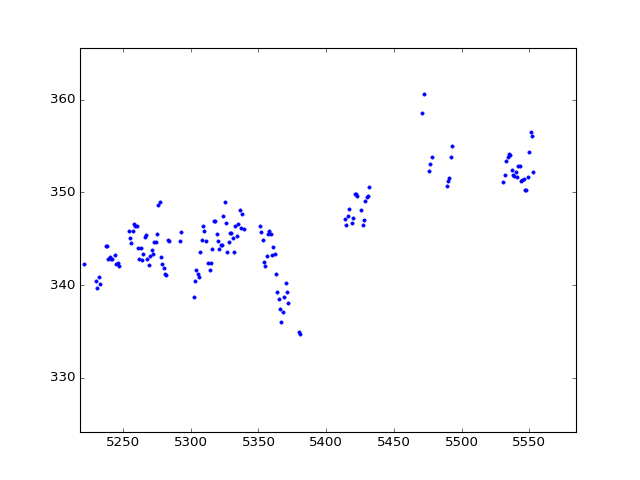

In [20]:
plt.figure()
plt.plot(ssfr['zbb'],'.')

In [19]:
ssfr['nspectra'].shape

(6032, 414)

<IPython.core.display.Javascript object>


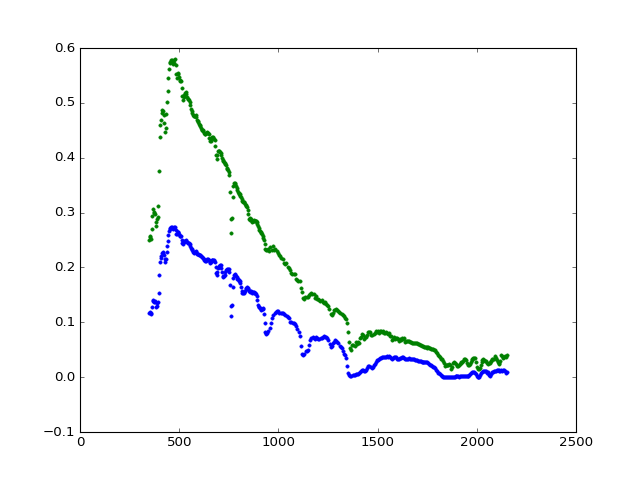

In [22]:
plt.figure()
plt.plot(ssfr['nadlambda'],ssfr['nspectra'][5359,:],'.')
plt.plot(ssfr['zenlambda'],ssfr['zspectra'][5359,:],'.')

In [24]:
from scipy.interpolate import interp1d
fn = interp1d(ssfr['nadlambda'],ssfr['nspectra'],axis=1,bounds_error=False)
ssfr['nnspectra'] = fn(ssfr['zenlambda'])

In [25]:
ssfr['nnspectra'].shape

(6032, 413)

In [26]:
wvl = np.arange(350,1701)

In [27]:
ssfr['nspectra1'] = fn(wvl)

In [28]:
fz = interp1d(ssfr['zenlambda'],ssfr['zspectra'],axis=1,bounds_error=False)
ssfr['zspectra1'] = fz(wvl)

# Find the correct times for plotting and outputting

## Old style

In [23]:
import Sp_parameters as Sp

In [10]:
iice = np.argmin(abs(ssfr.tmhrs-21.5828))
iwat = np.argmin(abs(ssfr.tmhrs-20.9261))

In [11]:
alb = ssfr.nspectra1/ssfr.zspectra1
alb[alb<=0.0] = 0.0
alb[alb>=1.0] = 1.0
alb[np.isnan(alb)] = 0.0

-c:1: RuntimeWarning: divide by zero encountered in divide
-c:1: RuntimeWarning: invalid value encountered in divide
-c:2: RuntimeWarning: invalid value encountered in less_equal
-c:3: RuntimeWarning: invalid value encountered in greater_equal


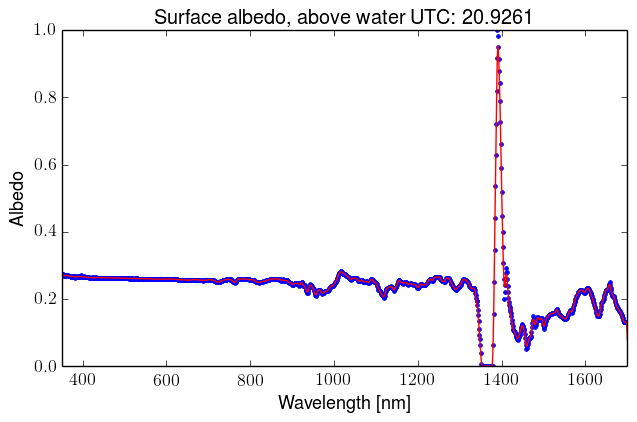

In [92]:
plt.plot(wvl,alb[iwat,:],'b.')
plt.plot(wvl,Sp.smooth(alb[iwat,:],5),'r')

plt.xlim([350,1700])
plt.ylim([0,1])
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')
plt.title('Surface albedo, above water UTC: %.4f' % ssfr.tmhrs[iwat])
plt.savefig(fp+'c130/'+daystr+'_ARISE_Flight_13/'+daystr+'_surface_albedo_water.png',dpi=600,transparent=True)

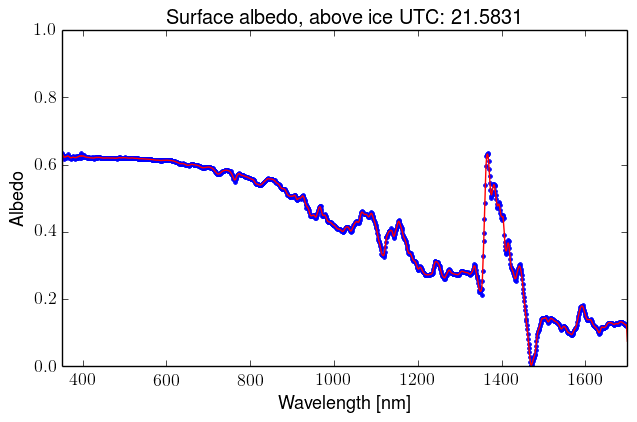

In [93]:
plt.plot(wvl,alb[iice,:],'b.')
plt.plot(wvl,Sp.smooth(alb[iice,:],5),'r')
plt.xlim([350,1700])
plt.ylim([0,1])
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')
plt.title('Surface albedo, above ice UTC: %.4f' % ssfr.tmhrs[iice])
plt.savefig(fp+'c130/'+daystr+'_ARISE_Flight_13/'+daystr+'_surface_albedo_ice.png',dpi=600,transparent=True)

In [94]:
alb_wat = Sp.smooth(alb[iwat,:],5)
alb_ice = Sp.smooth(alb[iice,:],5)

## New hdf5 files

In [29]:
t_wat1 = [19.62,19.72]
t_ice1 = [20.10,20.14]
t_wat2 = [20.93,21.07]
t_ice2 = [21.36,21.44]
t_wat3 = [22.02,22.14]

In [41]:
iw1 = (ssfr['utc']>t_wat1[0]) & (ssfr['utc']<t_wat1[1])
iw2 = (ssfr['utc']>t_wat2[0]) & (ssfr['utc']<t_wat2[1])
iw3 = (ssfr['utc']>t_wat3[0]) & (ssfr['utc']<t_wat3[1])
ic1 = (ssfr['utc']>t_ice1[0]) & (ssfr['utc']<t_ice1[1])
ic2 = (ssfr['utc']>t_ice2[0]) & (ssfr['utc']<t_ice2[1])

In [42]:
alb = ssfr['nspectra1']/ssfr['zspectra1']

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in divide
  """Entry point for launching an IPython kernel.


In [115]:
u1 = (alb[iw1,400]>0) & (alb[iw1,400]<1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [124]:
alb[alb>1]=1.0
alb[alb<0]=0.0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


<IPython.core.display.Javascript object>


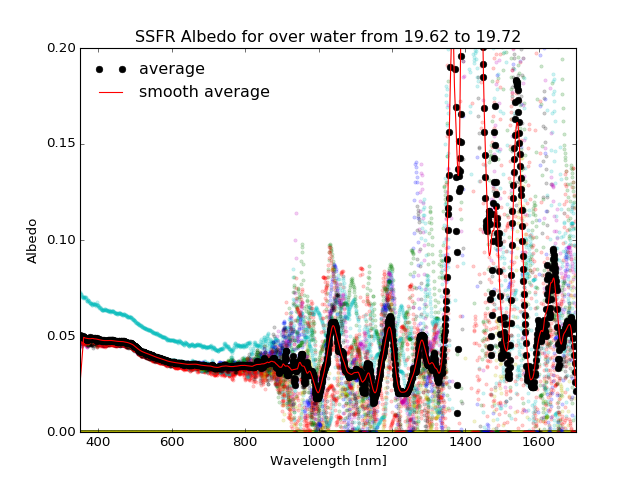

In [130]:
plt.figure()
for n in xrange(len(ssfr['utc'][iw1])):
    plt.plot(wvl,alb[iw1,:][n],'.',alpha=0.2)
plt.plot(wvl,np.nanmean(alb[iw1,:][u1],axis=0),'ok',label='average')
plt.plot(wvl,Sp.smooth(np.nanmean(alb[iw1,:][u1],axis=0),20,old=True),'-r',label='smooth average')
plt.ylim(0,0.2)
plt.xlim(350,1701)
plt.title('SSFR Albedo for over water from {} to {}'.format(t_wat1[0],t_wat1[1]))
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')
plt.legend(frameon=False,loc=2)
plt.savefig(fp+'plots_v2/SSFR_albedo_over_water1.png',dpi=600,transparent=True)

In [134]:
u2 = (alb[iw2,400]>0) & (alb[iw2,400]<1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


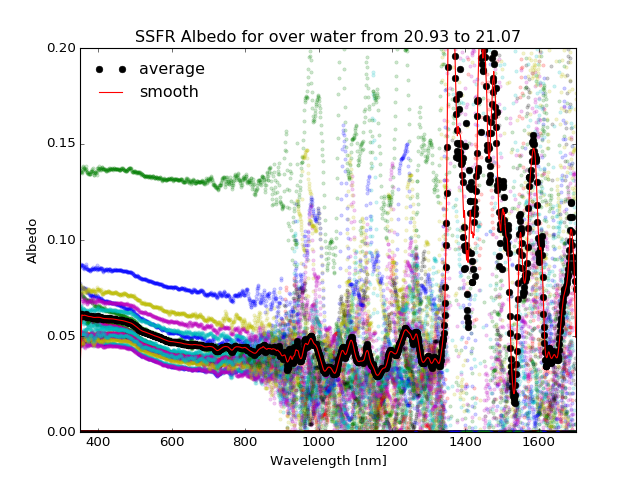

In [139]:
plt.figure()
for n in xrange(len(ssfr['utc'][iw2])):
    plt.plot(wvl,alb[iw2,:][n],'.',alpha=0.2)
plt.plot(wvl,np.nanmean(alb[iw2,:][u2],axis=0),'ok',label='average')
plt.plot(wvl,Sp.smooth(np.nanmean(alb[iw2,:][u2],axis=0),10,old=True),'-r',label='smooth')
plt.legend(frameon=False,loc=2)
plt.ylim(0,0.2)
plt.xlim(350,1701)
plt.title('SSFR Albedo for over water from {} to {}'.format(t_wat2[0],t_wat2[1]))
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')

plt.savefig(fp+'plots_v2/SSFR_albedo_over_water2_intermediate.png',dpi=600,transparent=True)

In [99]:
uu = (alb[iw3,400]>0) & (alb[iw3,400]<1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


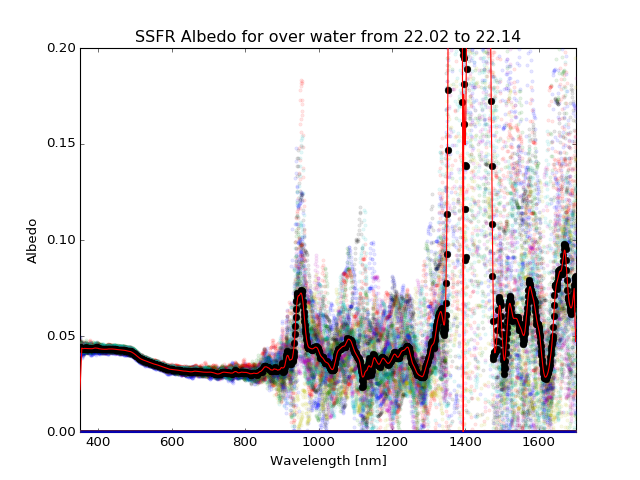

In [111]:
plt.figure()
for n in xrange(len(ssfr['utc'][iw3])):
    plt.plot(wvl,alb[iw3,:][n],'.',alpha=0.1,zorder=10)
plt.plot(wvl,np.nanmean(alb[iw3,:][uu],axis=0),'ok',zorder=90)
plt.plot(wvl,Sp.smooth(np.nanmean(alb[iw3,:][uu],axis=0),10,old=True),'-r',zorder=90)
plt.ylim(0,0.2)
plt.xlim(350,1701)
plt.title('SSFR Albedo for over water from {} to {}'.format(t_wat3[0],t_wat3[1]))
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')

<IPython.core.display.Javascript object>


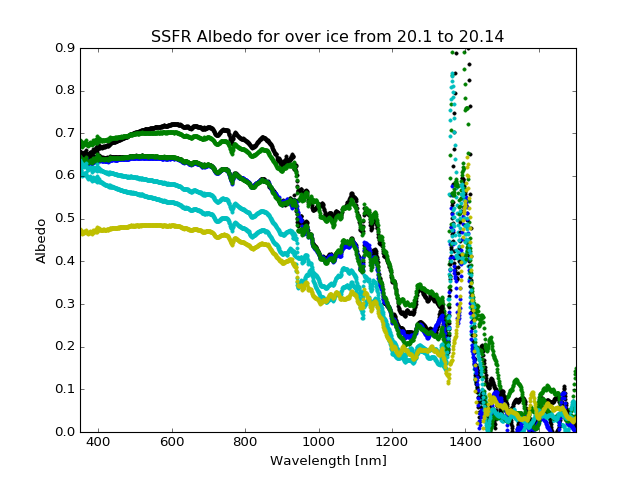

In [46]:
plt.figure()
for n in xrange(len(ssfr['utc'][ic1])):
    plt.plot(wvl,alb[ic1,:][n],'.')
plt.ylim(0,0.9)
plt.xlim(350,1701)
plt.title('SSFR Albedo for over ice from {} to {}'.format(t_ice1[0],t_ice1[1]))
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')

<IPython.core.display.Javascript object>


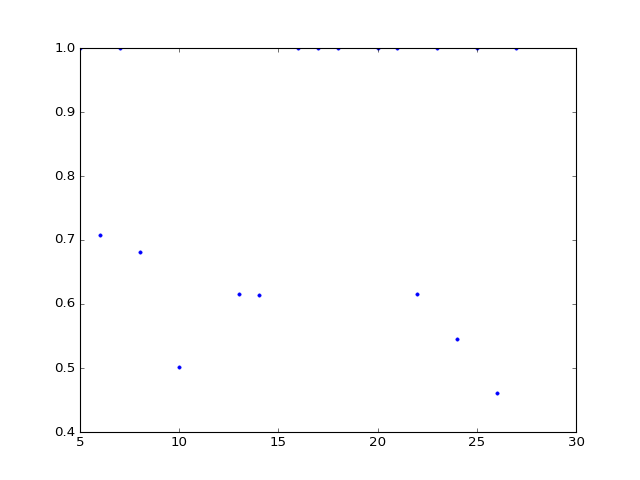

In [143]:
plt.figure()
plt.plot(alb[ic1,400],'.')

<IPython.core.display.Javascript object>


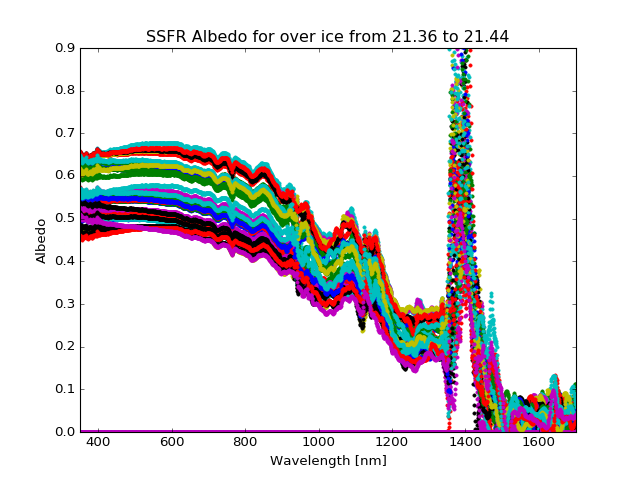

In [48]:
plt.figure()
for n in xrange(len(ssfr['utc'][ic2])):
    plt.plot(wvl,alb[ic2,:][n],'.')
plt.ylim(0,0.9)
plt.xlim(350,1701)
plt.title('SSFR Albedo for over ice from {} to {}'.format(t_ice2[0],t_ice2[1]))
plt.ylabel('Albedo')
plt.xlabel('Wavelength [nm]')

In [148]:
wvl[1250]

1600

<IPython.core.display.Javascript object>


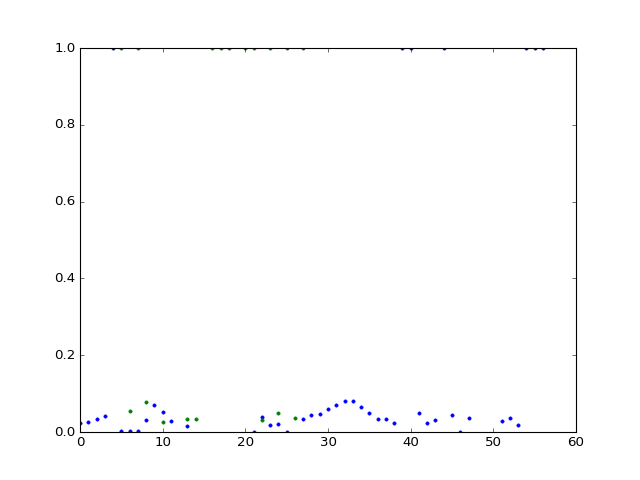

In [149]:
plt.figure()
plt.plot(alb[ic2,1250],'.')
plt.plot(alb[ic1,1250],'.')


<IPython.core.display.Javascript object>


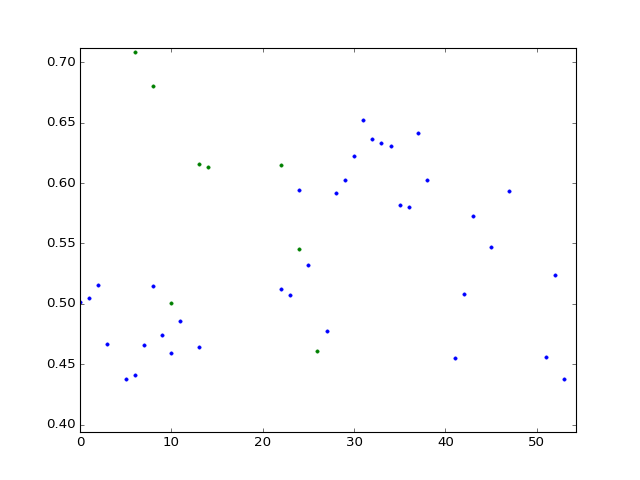

In [144]:
plt.figure()
plt.plot(alb[ic2,400],'.')
plt.plot(alb[ic1,400],'.')


In [150]:
ic_top = (alb[ic2,400]>0.6) & (alb[ic2,400]<1)
ic_mid = (alb[ic2,400]>0.5) & (alb[ic2,400]<0.6)
ic_low = (alb[ic2,400]>0.4) & (alb[ic2,400]<0.5)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


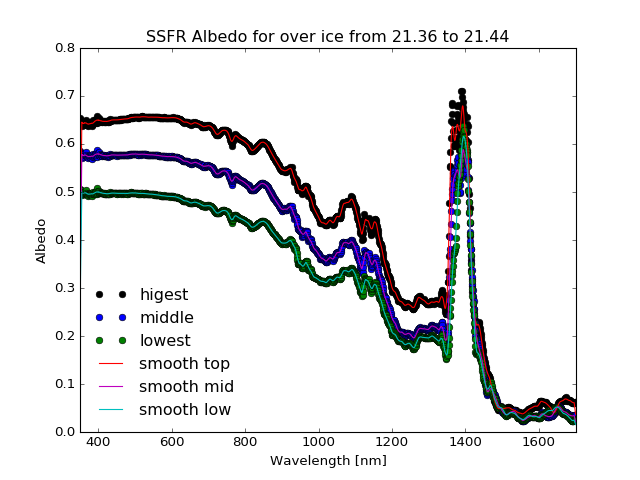

In [155]:
plt.figure()
plt.plot(wvl,np.nanmean(alb[ic2,:][ic_top],axis=0),'ok',label='higest')
plt.plot(wvl,np.nanmean(alb[ic2,:][ic_mid],axis=0),'ob',label='middle')
plt.plot(wvl,np.nanmean(alb[ic2,:][ic_low],axis=0),'og',label='lowest')

plt.plot(wvl,Sp.smooth(np.nanmean(alb[ic2,:][ic_top],axis=0),10,old=True),'-r',label='smooth top')
plt.plot(wvl,Sp.smooth(np.nanmean(alb[ic2,:][ic_mid],axis=0),10,old=True),'-m',label='smooth mid')
plt.plot(wvl,Sp.smooth(np.nanmean(alb[ic2,:][ic_low],axis=0),10,old=True),'-c',label='smooth low')

plt.legend(frameon=False,loc=3)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Albedo')

plt.xlim(350,1701)
plt.title('SSFR Albedo for over ice from {} to {}'.format(t_ice2[0],t_ice2[1]))


plt.savefig(fp+'plots_v2/SSFR_albedo_over_ice_3subset.png',dpi=600,transparent=True)

# Save to file

## Old style

In [95]:
f = open(fp+daystr+'_surf_alb_water.dat','w')
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],alb_wat[i]))
f.close()

In [96]:
f = open(fp+daystr+'_surf_alb_ice.dat','w')
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],alb_ice[i]))
f.close()

## New 

In [141]:
f = open(fp+daystr+'_surf_alb_water1_pure.dat','w')
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],Sp.smooth(np.nanmean(alb[iw1,:][u1],axis=0),20,old=True)[i]))
f.close()

In [140]:
f = open(fp+daystr+'_surf_alb_water2_inter.dat','w')
aa = Sp.smooth(np.nanmean(alb[iw2,:][u2],axis=0),10,old=True)
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],aa[i]))
f.close()

In [156]:
f = open(fp+daystr+'_surf_alb_ice_top.dat','w')
aa = Sp.smooth(np.nanmean(alb[ic2,:][ic_top],axis=0),10,old=True)
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],aa[i]))
f.close()

In [157]:
f = open(fp+daystr+'_surf_alb_ice_mid.dat','w')
aa = Sp.smooth(np.nanmean(alb[ic2,:][ic_mid],axis=0),10,old=True)
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],aa[i]))
f.close()

In [158]:
f = open(fp+daystr+'_surf_alb_ice_low.dat','w')
aa = Sp.smooth(np.nanmean(alb[ic2,:][ic_low],axis=0),10,old=True)
for i in xrange(len(wvl)):
    f.write('%i %.4f \n' % (wvl[i],aa[i]))
f.close()